## KNN

Very simple multi-classification.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc

In [55]:
n  = 50
nn = 4

In [11]:
X, y = mc(n, 1, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1)

In [12]:
X0 = X[np.where(y==0)]
y0 = np.zeros(X0.shape)
X1 = X[np.where(y==1)]
y1 = np.ones(X1.shape)

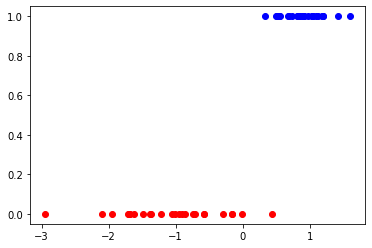

In [13]:
plt.scatter(X0, y0, c='red')
plt.scatter(X1, y1, c='blue')

In [30]:
def mse(x0,y0,x1,y1): return 1/2*((x0-x1)**2+(y0-y1)**2)

Define a new data point to classify

In [31]:
n_p = np.array([1, 0.6])

In [34]:
assert mse(1, 2, 1, 2) == 0

Calculate the distance of the new point to every other point and return the distances with the corresponding class.

In [82]:
def cmse(X,y,n_p):
    err=[]
    for i,j in zip(X,y):
        err.append([mse(i[0],j,n_p[0],n_p[1]),j])
    return np.array(sorted(err, key=lambda err: err[0]))

In [83]:
n_p_mse = cmse(X,y,n_p)

Return the most occouring class.

In [100]:
def cnn(cmse):
    cs = cmse[:nn,1]
    (values,counts) = np.unique(cs,return_counts=True)
    ind = np.argmax(counts)
    return values[ind]

In [103]:
c = cnn(n_p_mse)

The new point is classified correctly.

In [107]:
if c == 0: color='red'
if c == 1: color='blue'

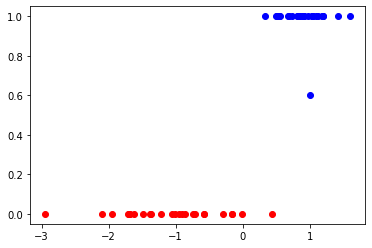

In [109]:
plt.scatter(X0, y0, c='red')
plt.scatter(X1, y1, c='blue')
plt.scatter(n_p[0], n_p[1], c=color)